In [1]:
import pandas as pd
import matplotlib.pyplot as plt

course_completion_data = pd.read_csv("test_data/course_completion_data.csv")
feedback_data = pd.read_csv("test_data/feedback_data.csv")
student_engagement_data = pd.read_csv("test_data/student_engagement_data.csv")

In [2]:
print("Descriptive of student engagement data：")
print(student_engagement_data.describe())

Descriptive of student engagement data：
         StudentID     LessonID  SessionTime
count  1000.000000  1000.000000  1000.000000
mean    507.312000    10.824000    35.312780
std     289.934218     5.868515    28.244593
min       1.000000     1.000000     5.001867
25%     248.500000     6.000000    10.109438
50%     516.500000    11.000000    14.944876
75%     766.250000    16.000000    60.725435
max    1000.000000    20.000000    89.952480


<Figure size 10000x8000 with 0 Axes>

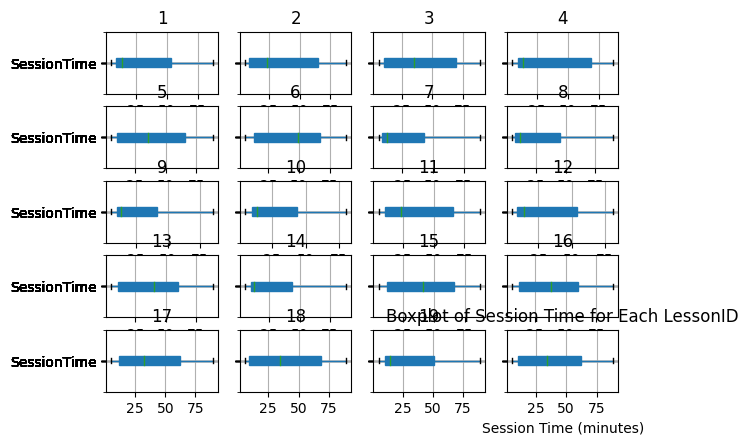

In [3]:
grouped_data = student_engagement_data.groupby('LessonID')

plt.figure(figsize=(100, 80))
boxplot = grouped_data.boxplot(column=['SessionTime'], vert=False, patch_artist=True)

plt.xlabel('Session Time (minutes)')
plt.ylabel('LessonID')
plt.title('Boxplot of Session Time for Each LessonID')
plt.grid(True)
plt.show()

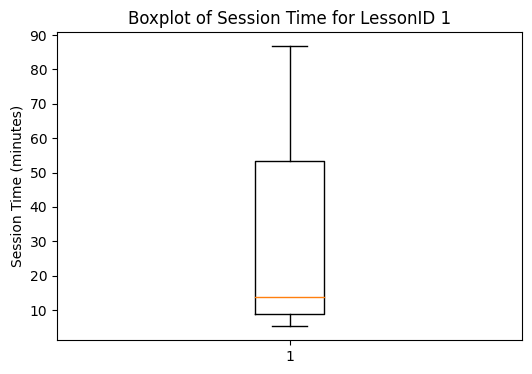

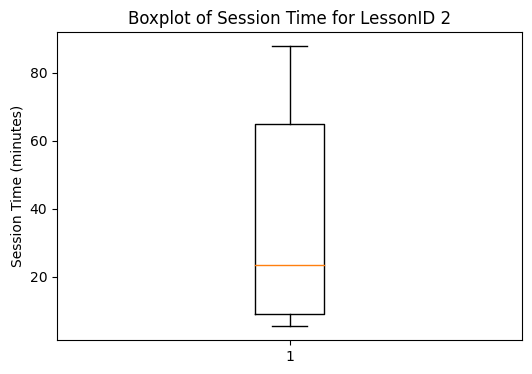

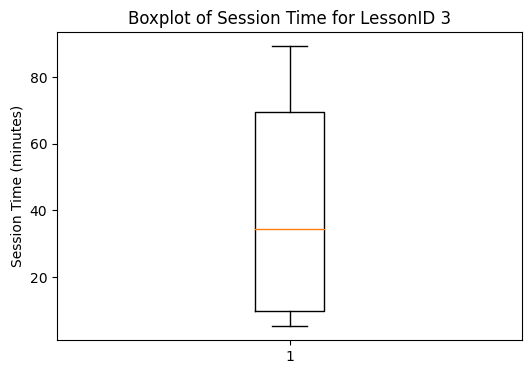

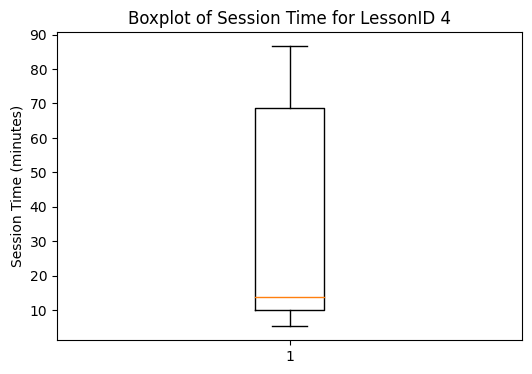

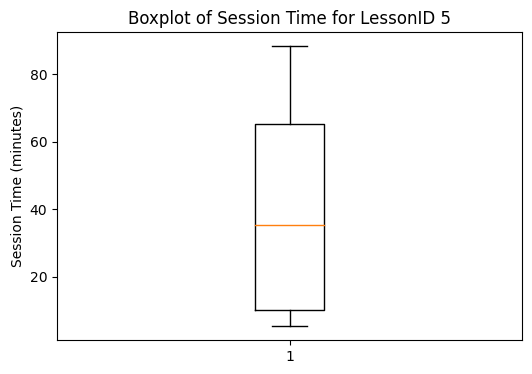

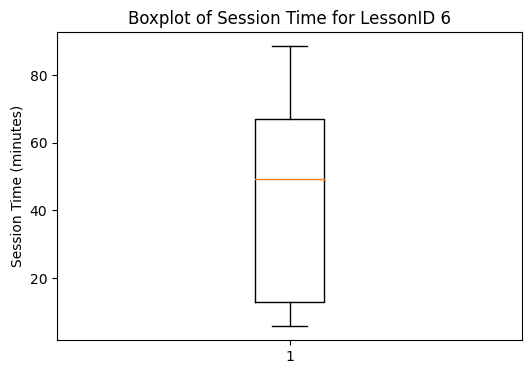

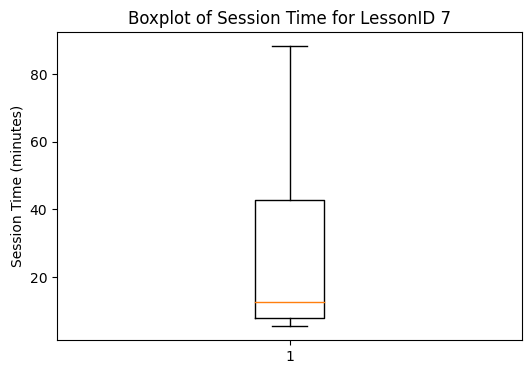

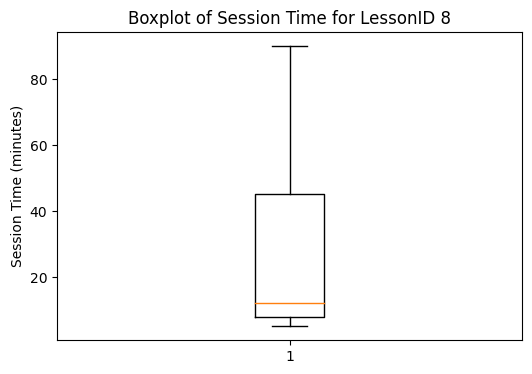

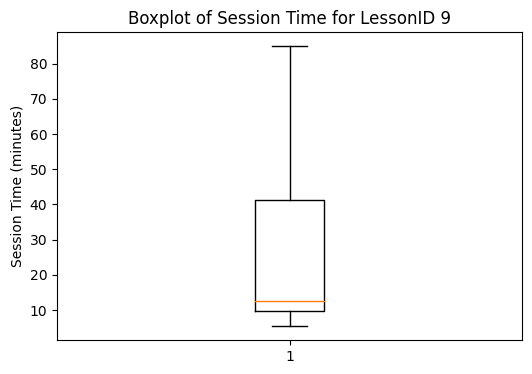

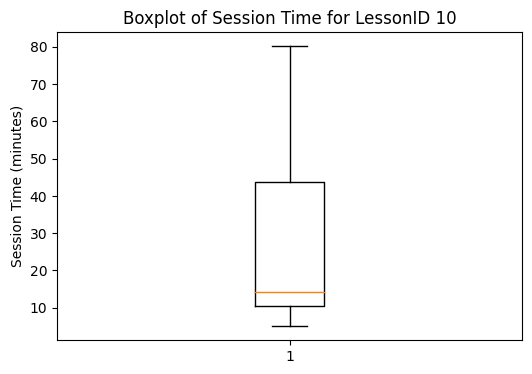

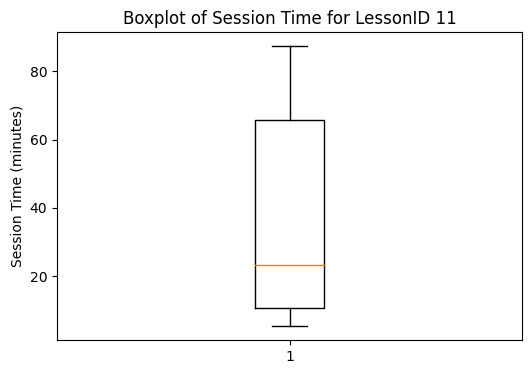

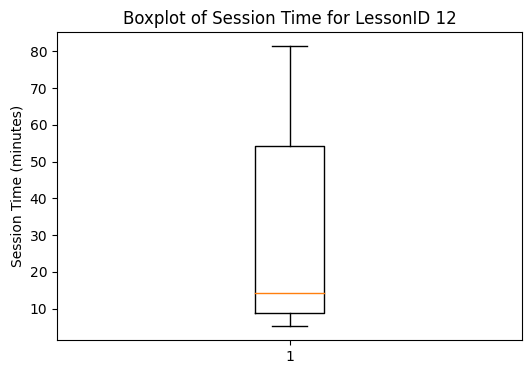

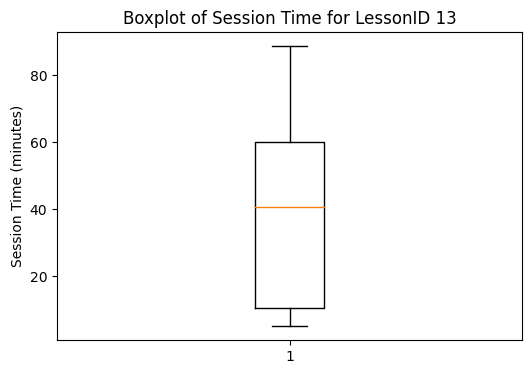

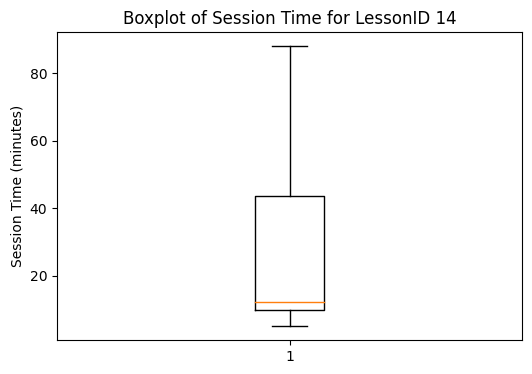

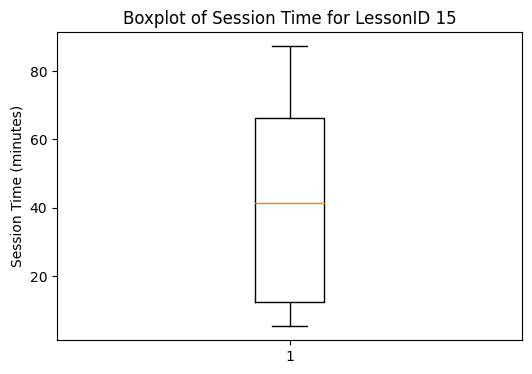

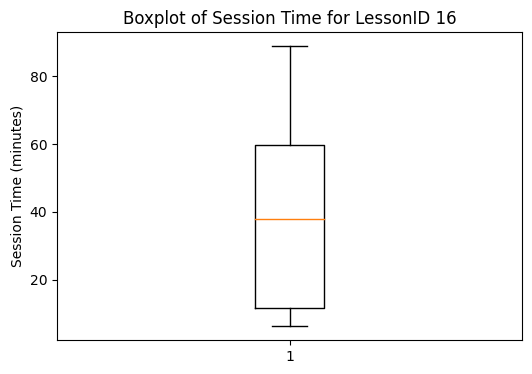

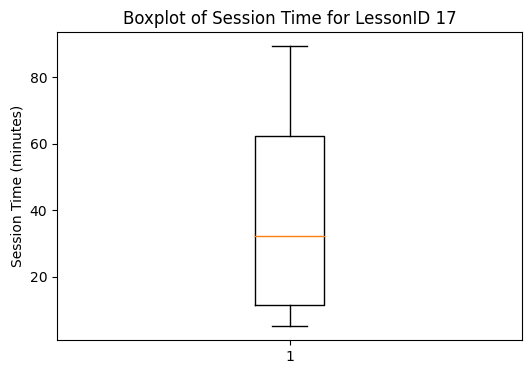

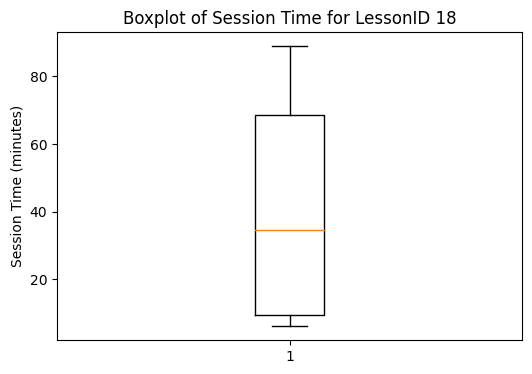

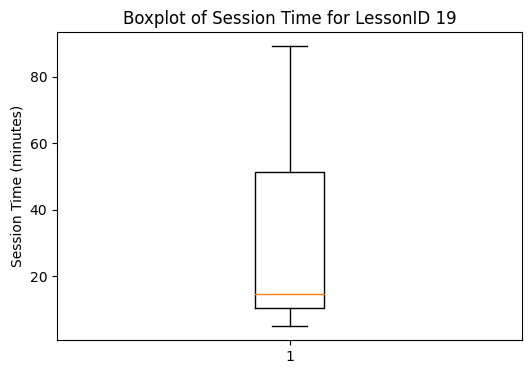

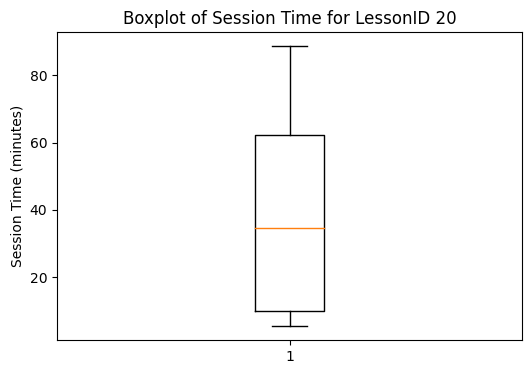

In [4]:
for lesson_id in range(1, 21):
    lesson_data = student_engagement_data[student_engagement_data['LessonID'] == lesson_id]
    
    session_time = lesson_data['SessionTime']
    
    plt.figure(figsize=(6, 4))
    plt.boxplot(session_time)
    plt.title(f'Boxplot of Session Time for LessonID {lesson_id}')
    plt.ylabel('Session Time (minutes)')
    plt.show()

In [5]:
lesson_describe = student_engagement_data.groupby('LessonID')['SessionTime'].describe()

lesson_describe

,count,mean,std,min,25%,50%,75%,max
LessonID,,,,,,,,
1,45.0,31.846652,27.542672,5.270782,8.852916,13.687286,53.357224,86.719195
2,50.0,36.581036,29.726393,5.390692,8.863431,23.412963,65.041807,87.834779
3,45.0,41.160831,29.734698,5.217018,9.913801,34.305114,69.487510,89.242227
4,44.0,34.648384,30.131950,5.377641,10.074557,13.990557,68.669921,86.586183
5,57.0,38.083698,28.582915,5.371811,10.163631,35.217321,65.308351,88.242143
6,55.0,44.632972,27.083792,5.809982,13.032627,49.370934,66.970461,88.482181
7,46.0,29.166045,28.186577,5.426159,7.965092,12.585773,42.881700,88.224618
8,57.0,27.446975,26.024017,5.097775,7.811356,12.036503,45.037286,89.952480
9,39.0,27.770178,26.221503,5.392023,9.838169,12.602791,41.335769,84.938821


In [6]:
# average session time for each lesson
lesson_duration_avg = student_engagement_data.groupby('LessonID')['SessionTime'].mean().reset_index()

course_completion_data = pd.merge(course_completion_data, lesson_duration_avg, on='LessonID', how='left')
course_completion_data.rename(columns={'SessionTime': 'AverageDuration'}, inplace=True)

# calculate the ratio of average duration to expected duration
course_completion_data['DurationRatio'] = course_completion_data['AverageDuration'] / course_completion_data['ExpectedDuration']

print(course_completion_data)

    LessonID  ExpectedDuration  CompletionRate  AverageDuration  DurationRatio
0          1          5.000000        1.000000        31.846652       6.369330
1          2          6.315789        0.868421        36.581036       5.791997
2          3          7.631579        0.736842        41.160831       5.393488
3          4          8.947368        0.605263        34.648384       3.872466
4          5         10.263158        0.500000        38.083698       3.710719
5          6         11.578947        0.500000        44.632972       3.854666
6          7         12.894737        0.500000        29.166045       2.261857
7          8         14.210526        0.500000        27.446975       1.931454
8          9         15.526316        0.500000        27.770178       1.788588
9         10         16.842105        0.500000        26.081173       1.548570
10        11         18.157895        0.500000        35.714372       1.966878
11        12         19.473684        0.500000      

In [7]:
%pip install seaborn

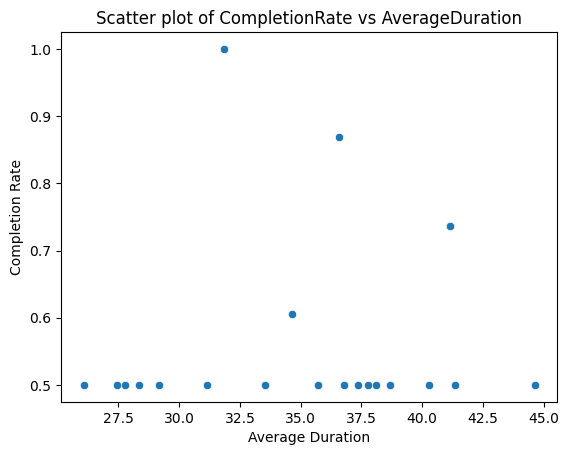

                            OLS Regression Results                            
Dep. Variable:         CompletionRate   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     60.76
Date:                Thu, 18 Apr 2024   Prob (F-statistic):           3.54e-07
Time:                        23:26:54   Log-Likelihood:                 26.024
No. Observations:                  20   AIC:                            -48.05
Df Residuals:                      18   BIC:                            -46.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3643      0.030     12.315

In [8]:
import seaborn as sns
import numpy as np
import statsmodels.api as sm

sns.scatterplot(x='AverageDuration', y='CompletionRate', data=course_completion_data)
plt.title('Scatter plot of CompletionRate vs AverageDuration')
plt.xlabel('Average Duration')
plt.ylabel('Completion Rate')
plt.show()

X = course_completion_data['DurationRatio']
y = course_completion_data['CompletionRate']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [9]:
replace_dict = {
    "Excellent": 5.0,
    "Good": 4.0,
    "Average": 3.0,
    "Needs Improvement": 2.0,
    "Poor": 1.0
}

# adjust FeedbackScore
feedback_data['FeedbackScore'] = feedback_data['FeedbackComment'].map(replace_dict)

merged_data = pd.merge(feedback_data, course_completion_data, on='LessonID', how='inner')



In [10]:
merged_data

,StudentID,LessonID,FeedbackScore,FeedbackComment,ExpectedDuration,CompletionRate,AverageDuration,DurationRatio
0,892,1,1.0,Poor,5.000000,1.000000,31.846652,6.369330
1,92,2,3.0,Average,6.315789,0.868421,36.581036,5.791997
2,973,3,4.0,Good,7.631579,0.736842,41.160831,5.393488
3,680,4,3.0,Average,8.947368,0.605263,34.648384,3.872466
4,214,5,3.0,Average,10.263158,0.500000,38.083698,3.710719
5,794,6,4.0,Good,11.578947,0.500000,44.632972,3.854666
6,769,7,4.0,Good,12.894737,0.500000,29.166045,2.261857
7,108,8,4.0,Good,14.210526,0.500000,27.446975,1.931454
8,931,9,5.0,Excellent,15.526316,0.500000,27.770178,1.788588
9,382,10,2.0,Needs Improvement,16.842105,0.500000,26.081173,1.548570


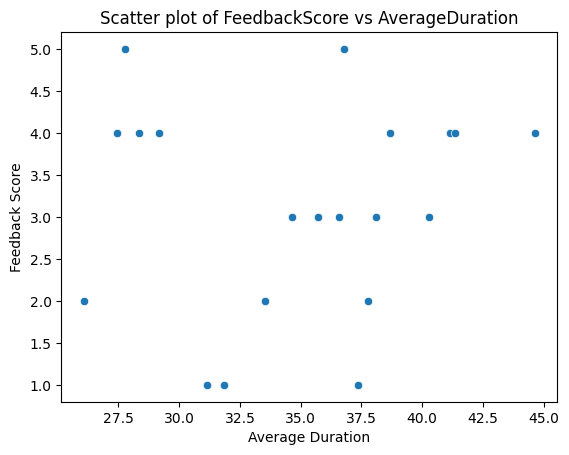

In [11]:
sns.scatterplot(x='AverageDuration', y='FeedbackScore', data=merged_data)
plt.title('Scatter plot of FeedbackScore vs AverageDuration')
plt.xlabel('Average Duration')
plt.ylabel('Feedback Score')
plt.show()

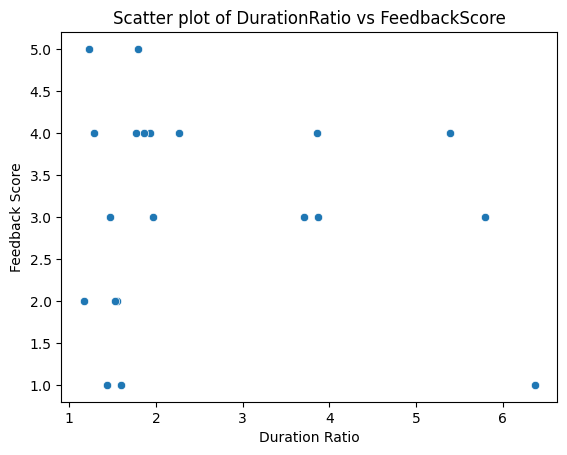

In [12]:
sns.scatterplot(x='DurationRatio', y='FeedbackScore', data=merged_data)
plt.title('Scatter plot of DurationRatio vs FeedbackScore')
plt.xlabel('Duration Ratio')
plt.ylabel('Feedback Score')
plt.show()

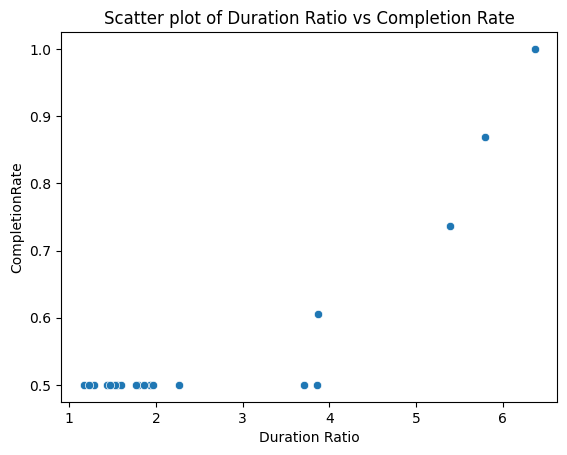

In [13]:
sns.scatterplot(x='DurationRatio', y='CompletionRate', data=merged_data)
plt.title('Scatter plot of Duration Ratio vs Completion Rate')
plt.xlabel('Duration Ratio')
plt.ylabel('CompletionRate')
plt.show()

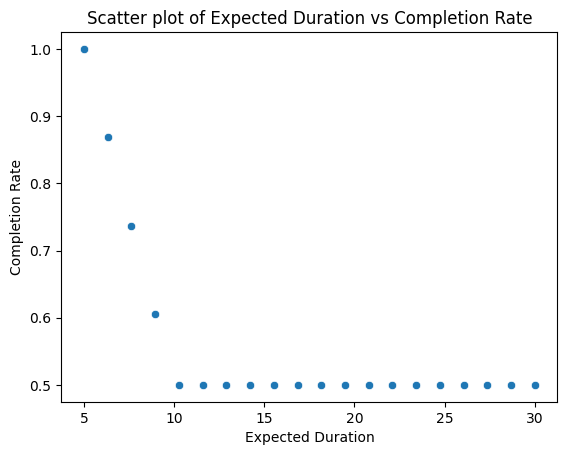

In [14]:
sns.scatterplot(x='ExpectedDuration', y='CompletionRate', data=merged_data)
plt.title('Scatter plot of Expected Duration vs Completion Rate')
plt.xlabel('Expected Duration')
plt.ylabel('Completion Rate')
plt.show()

In [15]:
from scipy.stats import pearsonr

x = merged_data['AverageDuration']
y = merged_data['FeedbackScore']

correlation, p_value = pearsonr(x, y)

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.09447523847937853
P-value: 0.6919653421892497


In [16]:
x = merged_data['DurationRatio']
y = merged_data['FeedbackScore']

correlation, p_value = pearsonr(x, y)

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: -0.09883459778121712
P-value: 0.6784646889444783


In [17]:
x = merged_data['DurationRatio']
y = merged_data['CompletionRate']

correlation, p_value = pearsonr(x, y)

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.8783262128700766
P-value: 3.5407815682646454e-07


In [18]:
x = merged_data['AverageDuration']
y = merged_data['CompletionRate']

correlation, p_value = pearsonr(x, y)

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: 0.03707344296464023
P-value: 0.8766837324919394


In [19]:
x = merged_data['ExpectedDuration']
y = merged_data['CompletionRate']

correlation, p_value = pearsonr(x, y)

print("Correlation:", correlation)
print("P-value:", p_value)

Correlation: -0.6508969134465392
P-value: 0.0018830080681946503
